In [1]:
import qiskit as q
%matplotlib inline
circuit = q.QuantumCircuit(4,4)
circuit.x(0)
circuit.cx(0,2)
circuit.measure([0,2],[0,2])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘  │  └╥┘   
q_1: ───────┼───╫────
          ┌─┴─┐ ║ ┌─┐
q_2: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
q_3: ───────────╫──╫─
                ║  ║ 
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╬═
                   ║ 
c_2: ══════════════╩═
                     
c_3: ════════════════

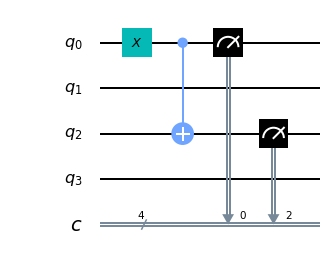

In [2]:
circuit.draw(output="mpl")

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account("f588ed6f7ae160a991f801f49484e4d0d393e8d13cba463209c4f0f6e19afdb2c676322a823ed1fc2783b6dc651e61642604b7977b35401b32090fc16b1452a8")

configrc.store_credentials:WARNING:2020-08-01 07:48:19,816: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider=IBMQ.get_provider("ibm-q")


In [7]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} qued and {qubit_count}qubits")    

ibmq_qasm_simulator has 1 qued and simulatedqubits
ibmqx2 has 4 qued and 5qubits
ibmq_16_melbourne has 7 qued and 15qubits
ibmq_vigo has 0 qued and 5qubits
ibmq_ourense has 66 qued and 5qubits
ibmq_valencia has 82 qued and 5qubits
ibmq_london has 2 qued and 5qubits
ibmq_burlington has 5 qued and 5qubits
ibmq_essex has 74 qued and 5qubits
ibmq_armonk has 1 qued and 1qubits


In [14]:
from qiskit.tools.monitor import job_monitor 
import qiskit as q
backend = provider.get_backend("ibmq_burlington")
job= q.execute(circuit,backend=backend,shots=500)
job_monitor(job)

Job Status: job has successfully run


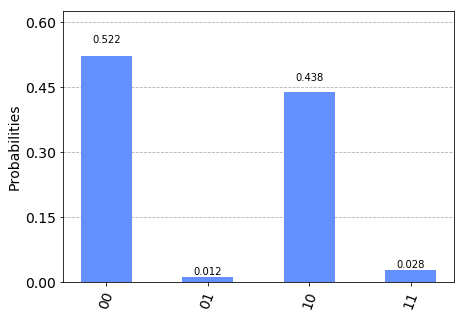

In [15]:
from qiskit.visualization import plot_histogram
import matplotlib 

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

In [10]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import  matplotlib 


%matplotlib inline
statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

def do_job(circuit):
    result = q.execute(circuit,backend=statevector_simulator).result()
    statevec = result.get_statevector()
    n_quibts = circuit.n_qubits
    circuit.measure([i for i in range(n_quibts)],[i for i in range(len(circuit.clbits))])
    qasm_job = q.execute(circuit,backend=qasm_sim,shots = 1024).result()
    counts = qasm_job.get_counts()
    return statevec,counts
    

C:\Users\DD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  


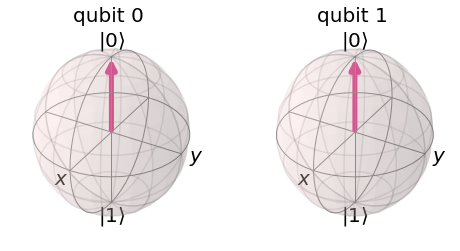

In [11]:
circuit=q.QuantumCircuit(2,2)
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)

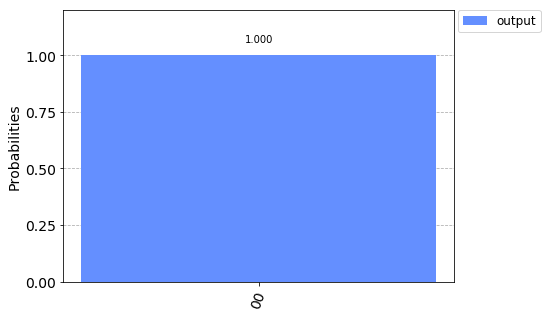

In [12]:
plot_histogram([counts],legend=["output"])

C:\Users\DD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  


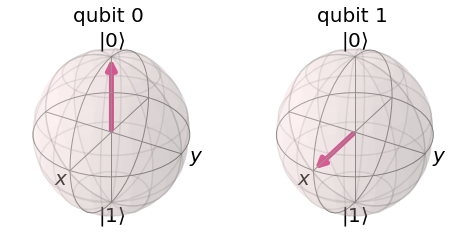

In [13]:
circuit=q.QuantumCircuit(2,2)
circuit.h(1)
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)

C:\Users\DD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  


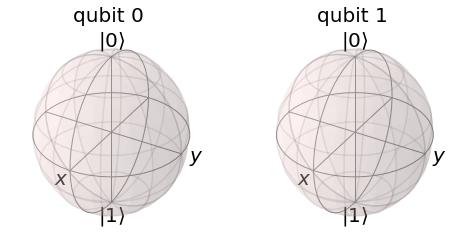

In [16]:

circuit=q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)

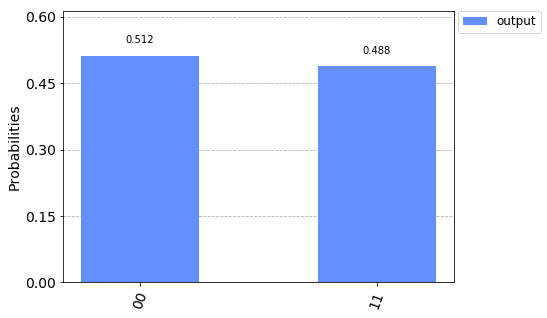

In [17]:
plot_histogram([counts],legend=["output"])

In [18]:
circuit=q.QuantumCircuit(3,3)
circuit.h(0)
circuit.ccx(0,1,2)
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────■──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════
               
c_2: ══════════

C:\Users\DD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  


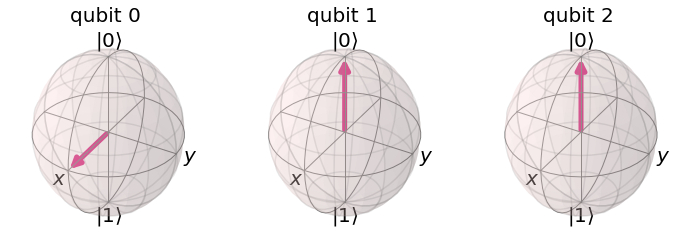

In [19]:
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)

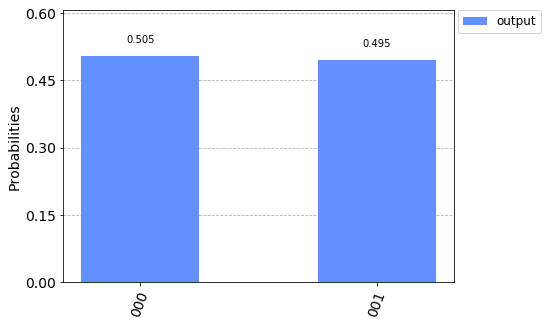

In [20]:
plot_histogram([counts],legend=["output"])

In [21]:
circuit=q.QuantumCircuit(3,1)
circuit.h(0)
circuit.ccx(0,1,2)

circuit.measure([2],[0])
circuit.draw()

┌───┐        
q_0: ┤ H ├──■─────
     └───┘  │     
q_1: ───────■─────
          ┌─┴─┐┌─┐
q_2: ─────┤ X ├┤M├
          └───┘└╥┘
c_0: ═══════════╩═

C:\Users\DD\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.n_qubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.num_qubits method instead.
  


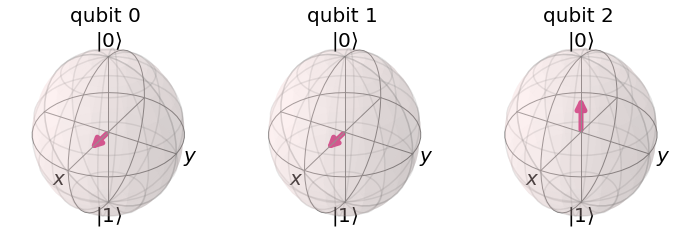

In [22]:
circuit=q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
#circuit.rx(math.pi,2)
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)


circuit=q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
#circuit.rx(math.pi,2)
circuit.x(2)
statevec,counts = do_job(circuit)
plot_bloch_multivector(statevec)

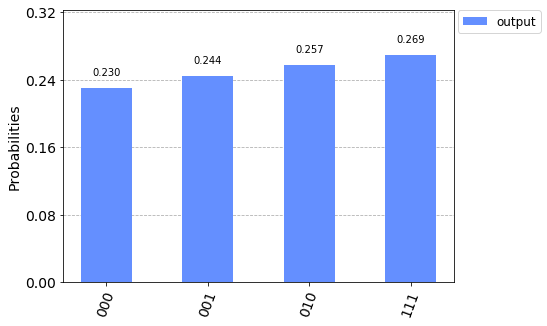

In [23]:
plot_histogram([counts],legend=["output"])

# HOW QUANTUN CONPUTERS ARE BETHER THAN CLASICAL CONPUTERS


In [24]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import  matplotlib 


%matplotlib inline
statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

In [28]:
c= q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
oring_statevec = q.execute(c,backend = statevector_simulator).result().get_statevector()
c.measure([0,1],[0,1])
c.draw()

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c_0: ══════╩══╬═
              ║ 
c_1: ═════════╩═

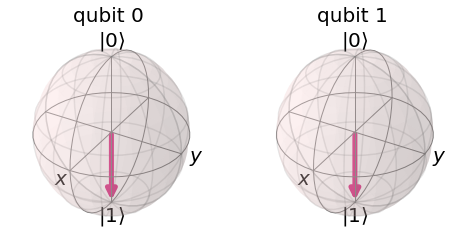

In [30]:
plot_bloch_multivector(oring_statevec)

In [32]:
c= q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
oring_statevec = q.execute(c,backend = statevector_simulator).result().get_statevector()
c.measure([0,1],[0,1])
c.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ X ├┤ H ├┤M├───
     ├───┤├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

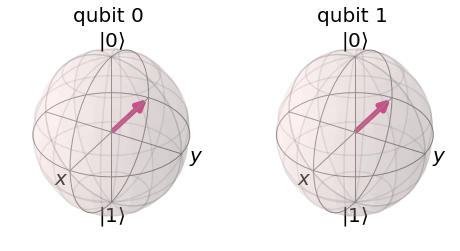

In [33]:
plot_bloch_multivector(oring_statevec)

In [34]:
c= q.QuantumCircuit(2,2)
c.h(0)
c.x(1)
c.h(0)
c.x(1)
c.h(0)
c.x(1)
oring_statevec = q.execute(c,backend = statevector_simulator).result().get_statevector()
c.measure([0,1],[0,1])
c.draw()

┌───┐┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ H ├┤ H ├┤M├───
     ├───┤├───┤├───┤└╥┘┌─┐
q_1: ┤ X ├┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c_0: ════════════════╩══╬═
                        ║ 
c_1: ═══════════════════╩═

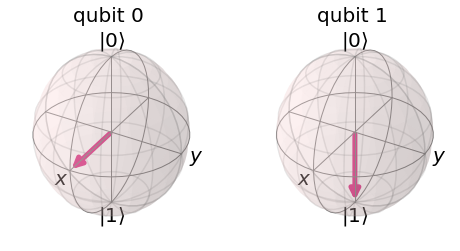

In [35]:
plot_bloch_multivector(oring_statevec)